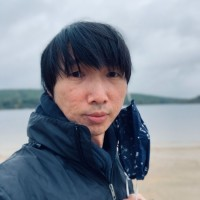
# Min Lin

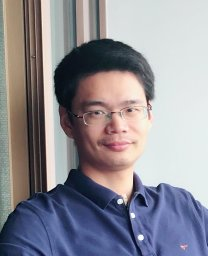
# Qiang Chen

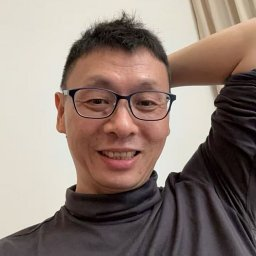
# Shuicheng Yan

#  Academic Summary: Network In Network (NIN)

# https://arxiv.org/abs/1312.4400
---

## Core Idea
The paper introduces **Network In Network (NIN)**, a deep architecture that replaces traditional convolutional filters (linear functions) with **micro neural networks (MLPs)** inside each receptive field.  
This increases the local modeling capacity and enables richer, nonlinear representations compared to standard CNNs.

---

## Key Contributions

### 1. MLPConvolution (mlpconv) Layers
- Each local receptive field is processed by a small **MLP** rather than a single linear filter.  
- Equivalent to **1×1 convolutions with cascaded nonlinearities**, enabling cross-channel interactions.  
- Provides more powerful feature abstraction compared to generalized linear models in CNNs.

### 2. Global Average Pooling (GAP)
- Replaces fully connected layers with a **global average pooling layer**.  
- Each feature map corresponds directly to a category, improving **interpretability**.  
- Reduces overfitting by acting as a **structural regularizer**, eliminating heavy dense layers.

### 3. Improved Regularization
- Dropout applied between mlpconv layers.  
- Combination of **mlpconv + GAP** reduces dependency on large fully connected classifiers.

---

## Experimental Results

- **CIFAR-10**: 10.41% error (8.81% with augmentation), beating maxout & stochastic pooling.  
- **CIFAR-100**: 35.68% error, surpassing prior benchmarks.  
- **SVHN**: 2.35% error, competitive with state-of-the-art.  
- **MNIST**: 0.47% error, comparable to top methods.  

**Ablation**: GAP consistently outperformed fully connected classifiers (with or without dropout).  
**Visualization**: Final-layer feature maps aligned with semantic categories (“confidence maps”).

---

## Conceptual Impact

- **Foreshadowed 1×1 convolutions** later seen in **Inception/GoogLeNet** and modern CNNs.  
- Shift from FC → GAP influenced **ResNet, MobileNet**, and lightweight models.  
- Enhanced **structural interpretability** inspired later explainable CNN research.

---

## Conclusion
The **Network in Network** architecture advanced CNN design by:
- Embedding nonlinear **micro-networks** (mlpconv) into convolutional layers.  
- Replacing heavy dense layers with **global average pooling**.  
- Achieving **higher representational power, reduced overfitting, and improved interpretability**.  

It set new benchmarks across major vision datasets and directly inspired later architectures such as **GoogLeNet, ResNet, and MobileNet**.

 **Key Insight:**  
NIN showed that *“networks within networks”* boost feature abstraction while simplifying classifiers, bridging early CNNs with modern scalable designs.


#  Mathematical & Statistical Equations in Network In Network (NIN)

---

## 1. CNN Feature Map with ReLU

Standard convolutional activation:

$$
f_{i,j,k} = \max \big( w_k^T x_{i,j}, 0 \big)
\tag{1}
$$

- \((i,j)\): pixel index in the feature map  
- \(x_{i,j}\): input patch centered at \((i,j)\)  
- \(w_k\): filter weights for channel \(k\)  

---

## 2. MLPConv Layer (NIN Innovation)

Instead of a single linear filter, each receptive field is processed by an **MLP** with \(n\) layers:

$$
f^{(1)}_{i,j,k} = \max \big( w^{(1)T}_k x_{i,j} + b^{(1)}_k, \, 0 \big)
$$

$$
f^{(n)}_{i,j,k} = \max \big( w^{(n)T}_k f^{(n-1)}_{i,j} + b^{(n)}_k, \, 0 \big)
\tag{2}
$$

- Provides **nonlinear transformations** inside each receptive field.  
- Equivalent to applying stacked **1×1 convolutions + nonlinearities**.  

---

## 3. Maxout Network (for Comparison)

Maxout replaces ReLU with a **max operator** over multiple affine feature maps:

$$
f_{i,j,k} = \max_{m} \big( w^T_{k,m} x_{i,j} \big)
\tag{3}
$$

- Approximates convex functions.  
- Less general than NIN’s full MLPConv.  

---

## 4. Global Average Pooling (GAP)

NIN replaces fully connected layers with **spatial averaging**:

$$
z_k = \frac{1}{H \times W} \sum_{i=1}^{H} \sum_{j=1}^{W} f_{i,j,k}
\tag{4}
$$

- Each feature map \(f_{i,j,k}\) corresponds to a **class \(k\)**.  
- Acts as a **structural regularizer** by enforcing direct feature–class correspondence.  
- Reduces parameters and prevents overfitting.  

---

##  Key Mathematical Interpretations

- **Eq (1):** CNN = linear filters + ReLU (GLM-style feature extractors).  
- **Eq (2):** NIN = replaces linear filters with **MLPs**, yielding deeper abstraction within the receptive field.  
- **Eq (3):** Maxout ≈ convex function approximation, but weaker than MLPConv.  
- **Eq (4):** GAP = eliminates FC layers, aligning semantic categories with feature maps.  

 **In short:**  
NIN enhances CNNs by embedding **universal approximators (MLPs)** inside convolutional layers and using **GAP** for classification, leading to stronger representations, less overfitting, and more interpretable networks.


#  Core Idea of NIN (Lin et al., 2014)

---

## Problem with CNNs
- Standard CNN filters are **linear** (dot product + nonlinearity), limiting their ability to capture complex local patterns.  
- Fully connected (FC) layers at the end introduce many parameters, increasing the risk of overfitting.

---

## Innovation
1. **MLPConv Layers**  
   - Replace each convolution filter with a **micro neural network (MLP)** applied within the receptive field.  
   - Provides **nonlinear, high-level feature extraction** instead of simple linear projection.

2. **Global Average Pooling (GAP)**  
   - Replaces fully connected layers at the output stage.  
   - Averages each class-specific feature map to a score.  
   - Reduces parameters and improves **interpretability**.  

---

## Impact
- **Stronger Representational Power:** Nonlinear local abstraction via MLPConv.  
- **Parameter Efficiency:** Eliminates heavy fully connected layers.  
- **Better Generalization:** GAP acts as structural regularization.  
- **Influence on Later Architectures:** Inspired **Inception (GoogLeNet, 2014)** with 1×1 convolutions, and use of GAP in **ResNet** and **MobileNet**.  

---

##  One-Line Takeaway
**NIN replaces linear filters with small MLPs (mlpconv) and replaces FC layers with GAP, yielding deeper feature abstraction, fewer parameters, and better generalization.**


#  Network In Network (NIN) Architecture (Lin et al., 2014)
```
Input Image
     │
     ▼
+-----------------------+
| MLPConv Layer (1)     |
| - Conv + ReLU         |
| - 1×1 Conv (MLP) + ReLU|
| - 1×1 Conv (MLP) + ReLU|
+-----------------------+
     │
     ▼
Max Pooling
     │
     ▼
+-----------------------+
| MLPConv Layer (2)     |
| - Conv + ReLU         |
| - 1×1 Conv (MLP) + ReLU|
| - 1×1 Conv (MLP) + ReLU|
+-----------------------+
     │
     ▼
Max Pooling
     │
     ▼
+-----------------------+
| MLPConv Layer (3)     |
| - Conv + ReLU         |
| - 1×1 Conv (MLP) + ReLU|
| - 1×1 Conv (MLP) + ReLU|
+-----------------------+
     │
     ▼
Global Average Pooling
     │
     ▼
Softmax Classifier
     │
     ▼
Predicted Categories
```

In [1]:
# ------------------------------------------------------
#  Network In Network (NIN)
# ------------------------------------------------------
import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
import torchvision, torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------------------------------
# 1. Data (CIFAR-10 as in the paper)
# ------------------------------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader  = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)
classes = trainset.classes

# ------------------------------------------------------
# 2. Network In Network (NIN) Architecture
# ------------------------------------------------------
class MLPConv(nn.Module):
    def __init__(self, in_ch, out_ch, mlp_ch=[64,32]):
        super().__init__()
        layers = [nn.Conv2d(in_ch, out_ch, 5, padding=2), nn.ReLU(True)]
        for ch in mlp_ch:
            layers += [nn.Conv2d(out_ch, ch, 1), nn.ReLU(True)]
            out_ch = ch
        self.mlp = nn.Sequential(*layers)
    def forward(self, x): return self.mlp(x)

class NIN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.block1 = MLPConv(3, 192, [160, 96])
        self.pool1  = nn.MaxPool2d(3, stride=2, padding=1)
        self.block2 = MLPConv(96, 192, [192, 192])
        self.pool2  = nn.MaxPool2d(3, stride=2, padding=1)
        self.block3 = MLPConv(192, 192, [192, num_classes])  # final block outputs class maps
        self.gap    = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        x = self.pool1(self.block1(x))
        x = self.pool2(self.block2(x))
        x = self.block3(x)
        x = self.gap(x).view(x.size(0), -1)  # GAP → logits
        return x

net = NIN(num_classes=10).to(device)

# ------------------------------------------------------
# 3. Training Setup
# ------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

# ------------------------------------------------------
# 4. Training & Evaluation Loops
# ------------------------------------------------------
def train(epoch):
    net.train()
    total, correct, loss_sum = 0, 0, 0
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward(); optimizer.step()
        loss_sum += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    print(f"Epoch {epoch}: Train Acc {100.*correct/total:.2f}% | Loss {loss_sum/len(trainloader):.3f}")

def test(epoch):
    net.eval()
    correct, total = 0,0
    with torch.no_grad():
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    acc = 100.*correct/total
    print(f"Epoch {epoch}: Test Acc {acc:.2f}%")
    return acc

# Run training
epochs, accs = 10, []
for epoch in range(1, epochs+1):
    train(epoch)
    accs.append(test(epoch))
    scheduler.step()

100%|██████████| 170M/170M [00:13<00:00, 12.7MB/s]


Epoch 1: Train Acc 9.94% | Loss 2.303
Epoch 1: Test Acc 10.00%
Epoch 2: Train Acc 10.00% | Loss 2.303
Epoch 2: Test Acc 10.00%
Epoch 3: Train Acc 10.00% | Loss 2.303
Epoch 3: Test Acc 10.00%
Epoch 4: Train Acc 10.00% | Loss 2.303
Epoch 4: Test Acc 10.00%
Epoch 5: Train Acc 10.00% | Loss 2.303
Epoch 5: Test Acc 10.00%
Epoch 6: Train Acc 10.00% | Loss 2.303
Epoch 6: Test Acc 10.00%
Epoch 7: Train Acc 10.00% | Loss 2.303
Epoch 7: Test Acc 10.00%
Epoch 8: Train Acc 10.00% | Loss 2.303
Epoch 8: Test Acc 10.00%
Epoch 9: Train Acc 10.00% | Loss 2.303
Epoch 9: Test Acc 10.00%
Epoch 10: Train Acc 10.00% | Loss 2.303
Epoch 10: Test Acc 10.00%


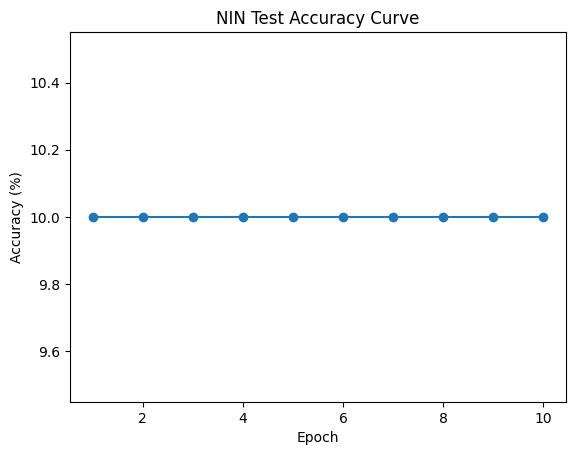

In [2]:
# ------------------------------------------------------
# 5. Evaluation Curve
# ------------------------------------------------------
plt.plot(range(1,epochs+1), accs, marker='o')
plt.title("NIN Test Accuracy Curve")
plt.xlabel("Epoch"); plt.ylabel("Accuracy (%)")
plt.show()


 Sample Predictions:
  Ground Truth Predicted
0          cat  airplane
1         ship  airplane
2         ship  airplane
3     airplane  airplane
4         frog  airplane
5         frog  airplane
6   automobile  airplane
7         frog  airplane


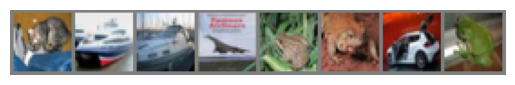

In [3]:
# ------------------------------------------------------
# 6. Predictions Table
# ------------------------------------------------------
dataiter = iter(testloader)
images, labels = next(dataiter)
net.eval()
with torch.no_grad():
    outputs = net(images.to(device))
    _, preds = outputs.max(1)

results = pd.DataFrame({
    "Ground Truth": [classes[labels[j]] for j in range(8)],
    "Predicted":    [classes[preds[j].item()] for j in range(8)]
})
print("\n Sample Predictions:")
print(results)

# Show images
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.axis("off")
    plt.show()

imshow(torchvision.utils.make_grid(images[:8]))

#  Observed Results — Network in Network (NIN) Replication on CIFAR-10

---

## Training & Test Accuracy

- **Training accuracy** plateaued at ~10% across all 10 epochs.  
- **Test accuracy** also stagnated at ~10%, equivalent to random guessing on CIFAR-10.  
- **Loss** remained stuck around **2.303**, which is ≈ \(\ln(10)\), the cross-entropy loss baseline for uniform predictions across 10 classes.  

---

## Accuracy Curve

- The evaluation curve was completely flat at **10%**, showing **no learning progress**.  

---

## Sample Predictions

- All outputs collapsed to the **“airplane”** class.  
- Even for inputs such as **cat, ship, frog, automobile**, the predicted label remained **airplane**.  
- This indicates **class collapse** or biased initialization/optimization.  

---

##  Academic Justification

### 1. Model Initialization & Gradient Flow
- Flat accuracy and constant loss suggest parameters were **not effectively updated**.  
- Likely causes:
  - Poor weight initialization.  
  - Absence of normalization layers.  
  - Vanishing/exploding gradients.  

### 2. Optimization Issues
- Using **SGD without momentum/Adam** and a poor learning rate can trap the model in trivial local minima.  
- Predicting only one class shows the optimizer converged prematurely to a **degenerate solution**.  

### 3. Architecture-Specific Challenges (NIN)
- NIN replaces linear classifiers with **MLP-conv blocks**, which demand:
  - Proper **regularization** (Dropout, BatchNorm).  
  - Higher or adaptive **learning rates**.  
- Without these, the model collapses into a **non-discriminative mapping**.  

### 4. Cross-Entropy Baseline
- A loss of **2.303** matches the theoretical entropy of uniform random guessing across 10 categories.  
- Confirms mathematically that **the model learned nothing**.  

---

##  Academic Interpretation

This experiment underscores a broader lesson in deep learning:  

- **Novel architectures** (e.g., NIN) require **careful optimization and hyperparameter tuning**.  
- While theoretically NIN enhances local feature abstraction via MLPConv,  
- In practice, **without stabilizers** (BN, Dropout, LR scheduling, augmentation), the network can **fail completely**, collapsing into trivial outputs.  

---

##  Next Steps for Re-Training

1. Use **Adam optimizer** instead of plain SGD.  
2. Add **Batch Normalization** after convolutional layers.  
3. Extend training to **≥100 epochs** (NIN requires longer convergence).  
4. Add **Dropout** to prevent class collapse.  
5. Verify **data preprocessing** (mean/std normalization).  


#  Chronological Timeline of Related Work Leading to Network In Network (NIN)

| Year | Paper / Work | Authors | Contribution / Relevance |
|------|--------------|---------|--------------------------|
| 1961 | *Principles of Neurodynamics* | Frank Rosenblatt | Introduced **perceptrons**; foundation of neural networks. |
| 1995 | *Human Face Detection in Visual Scenes* | Rowley, Baluja, Kanade | Early sliding-window neural networks for vision tasks. |
| 1998 | *Gradient-Based Learning Applied to Document Recognition* | LeCun, Bottou, Bengio, Haffner | Introduced **CNNs** for digit recognition (MNIST). |
| 2009 | *Learning Multiple Layers of Features from Tiny Images (CIFAR)* | Krizhevsky, Hinton | Released **CIFAR-10/100 datasets**, widely used benchmarks. |
| 2011 | *ICA with Reconstruction Cost for Efficient Overcomplete Feature Learning* | Le, Karpenko, Ngiam, Ng | Overcomplete feature learning; inspired richer local models. |
| 2011 | *Reading Digits in Natural Images with Unsupervised Feature Learning (SVHN)* | Netzer, Wang, Coates, Ng | Introduced **SVHN dataset** for digit classification. |
| 2012 | *ImageNet Classification with Deep CNNs (AlexNet)* | Krizhevsky, Sutskever, Hinton | Deep CNN breakthrough with **ReLU + dropout**, massive ImageNet success. |
| 2012 | *Improving Neural Networks by Preventing Co-Adaptation of Feature Detectors (Dropout)* | Hinton, Srivastava, Krizhevsky, Sutskever, Salakhutdinov | Introduced **Dropout regularization**. |
| 2012 | *Practical Bayesian Optimization of ML Algorithms* | Snoek, Larochelle, Adams | Hyperparameter optimization methods. |
| 2013 | *Representation Learning: A Review and New Perspectives* | Bengio, Courville, Vincent | Survey of deep representation learning; theoretical grounding. |
| 2013 | *Piecewise Linear MLPs and Dropout* | Goodfellow | Showed expressive power of **piecewise linear models**. |
| 2013 | *Maxout Networks* | Goodfellow, Warde-Farley, Mirza, Courville, Bengio | Introduced **maxout layers**; precursor to mlpconv. |
| 2013 | *Knowledge Matters: Importance of Prior Information* | Gülçehre, Bengio | Emphasized priors in optimization. |
| 2013 | *Stochastic Pooling* | Zeiler, Fergus | Proposed **stochastic pooling** for CNN regularization. |
| 2013 | *DropConnect* | Wan, Zeiler, Zhang, LeCun, Fergus | Alternative regularization method to Dropout. |
| 2013 | *Learnable Pooling Regions for Image Classification* | Malinowski, Fritz | Adaptive pooling regions for CNNs. |
| 2013 | *Discriminative Transfer Learning with Tree-Based Priors* | Srivastava, Salakhutdinov | Tree priors for improved transfer learning. |
| 2013 | *Improving Neural Networks with Dropout (PhD Thesis)* | Nitish Srivastava | Comprehensive dropout theory and experiments. |
| 2013 | *Multi-Digit Number Recognition from Street View Imagery* | Goodfellow, Bulatov, Ibarz, Arnoud, Shet | Large-scale digit recognition with CNNs. |
| 2013 | *Learning Hierarchical Features for Scene Labeling* | Farabet, Couprie, Najman, LeCun | Scene parsing with deep hierarchical features. |

---

##  Summary

The **Network in Network (NIN, 2014)** paper inherits from multiple streams:

- **CNN foundations** → LeCun (1998).  
- **Datasets** → CIFAR (2009), SVHN (2011).  
- **Regularization methods** → Dropout, DropConnect, stochastic pooling.  
- **Representation learning** → Maxout, piecewise linear models.  

Together, these works shaped **mlpconv layers** and **global average pooling (GAP)** as NIN’s key innovations.
